In [2]:
import svgwrite
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2
import utils as U

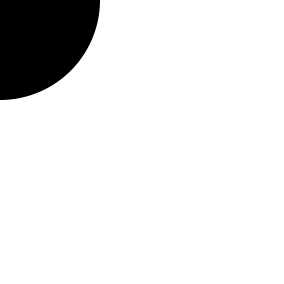

In [3]:
points = []

for i in range( 720 ):
	x = 100.0 * np.cos( np.radians( 360.0/720 * i ) )
	y = 100.0 * np.sin( np.radians( 360.0/720 * i ) )
	points.append( [x,y] )

size = 284    
dwg = svgwrite.Drawing(size=(size, size), debug=True)
dwg.add( dwg.polygon( points=points ) )
dwg.filename = 'hoge.svg'
dwg.save()
dwg

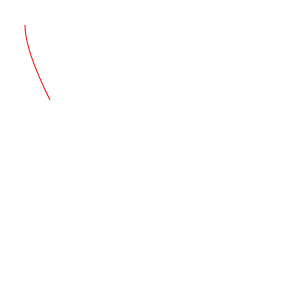

In [4]:
d = svgwrite.Drawing(size=(size, size), debug=True)

# s = []

# s.append("M 50 100")
# s.append("C 50 50 25 50 25 25")

path = d.path(stroke_width=1, stroke='red', fill='none')
path.push('M', np.array([50, 100]))
# path.push('C', np.array([[50, 50], [25, 50], [25, 25]]))
path.push('Q', np.array([[25, 50], [25, 25]]))

d.add(path)


d

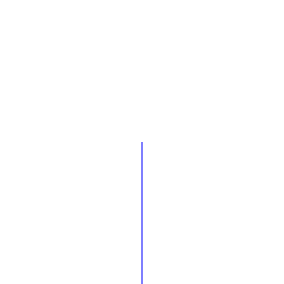

In [5]:
d = svgwrite.Drawing(size=(size, size), debug=True)

# width = 0.1
# begin = 0.5 - width * 0.5



# path = d.path(stroke_width=1, stroke='red', fill='none')
# path.push('M', np.array([50, 100]))
# path.push('Q', np.array([[25, 50], [25, 25]]))

# d.add(path)

y = np.linspace(1.0, 0.5, 50)
x = np.ones(len(y)) * 0.5

bone = np.vstack([x,y]).T

d.add(d.polyline(points=bone * size, stroke_width=1, stroke='blue'))

d

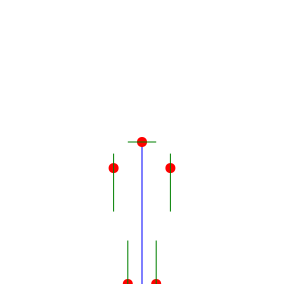

In [6]:
d = svgwrite.Drawing(size=(size, size), debug=True)

y = np.linspace(1.0, 0.5, 50)
x = np.ones(len(y)) * 0.5

bone = np.vstack([x,y]).T
d.add(d.polyline(points=bone * size, stroke_width=1, stroke='blue'))

diff = np.diff(bone, axis=0)
diff = np.vstack([diff, diff[-1:]])

length = np.linalg.norm(diff, axis=1).sum()


# begin point
width = 0.05
idx = 0
direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

p = bone[idx] + width * norm_direction
d.add(d.circle(p * size, fill='red', r=5))


a = p + direction * length * 0.3
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

# end point
p = bone[idx] - width * norm_direction
d.add(d.circle(p * size, fill='red', r=5))

a_ = p + direction * length * 0.3
d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))


# second point

s = 0.10
idx = int(len(bone) * 0.8)
direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

p = bone[idx] + norm_direction * s
a_ = p - direction * length * 0.3
a = p + direction * length * 0.1

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

# 4th point

p = bone[idx] - norm_direction * s
a_ = p + direction * length * 0.1
a = p - direction * length * 0.3

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

# third point
idx = len(bone) - 1
p = bone[idx]

direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

a_ = p - norm_direction * width
a = p + norm_direction * width

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))


# path = d.path(stroke_width=1, stroke='red', fill='none')
# path.push('M', np.array([50, 100]))
# path.push('Q', np.array([[25, 50], [25, 25]]))

# d.add(path)


d

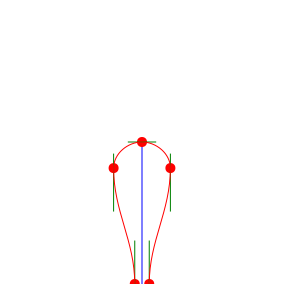

In [7]:
d = svgwrite.Drawing(size=(size, size), debug=True)

y = np.linspace(1.0, 0.5, 50)
x = np.ones(len(y)) * 0.5

bone = np.vstack([x,y]).T
d.add(d.polyline(points=bone * size, stroke_width=1, stroke='blue'))

diff = np.diff(bone, axis=0)
diff = np.vstack([diff, diff[-1:]])

length = np.linalg.norm(diff, axis=1).sum()

# points = []

# begin point
width = length * 0.05
idx = 0
direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

p = bone[idx] + width * norm_direction
d.add(d.circle(p * size, fill='red', r=5))


a = p + direction * length * 0.3
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

begin_point = {
    "pos": p,
    "a": a,    
}

# end point
p = bone[idx] - width * norm_direction
d.add(d.circle(p * size, fill='red', r=5))

a_ = p + direction * length * 0.3
d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))

end_point = {
    "pos": p,
    "a_": a_
}


# second point

s = 0.10
idx = int(len(bone) * 0.8)
direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

p = bone[idx] + norm_direction * s
a_ = p - direction * length * 0.3
a = p + direction * length * 0.1

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

second_point = {
    "pos": p,
    "a": a,
    "a_": a_
}

# 4th point
p = bone[idx] - norm_direction * s
a_ = p + direction * length * 0.1
a = p - direction * length * 0.3

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

forth_point = {
    "pos": p,
    "a": a,
    "a_": a_
    }

# third point
idx = len(bone) - 1
p = bone[idx]

direction = U.direction(diff[idx])
norm_direction = U.norm(direction)

a = p - norm_direction * s * 0.5
a_ = p + norm_direction * s * 0.5

d.add(d.circle(p * size, fill='red', r=5))

d.add(d.line(start=p * size, end=a_*size, stroke_width=1, stroke='green'))
d.add(d.line(start=p * size, end=a*size, stroke_width=1, stroke='green'))

third_point = {
    "pos": p,
    "a": a,
    "a_": a_
}

points = [
    begin_point,
    second_point,
    third_point,
    forth_point,
    end_point,
]

path = d.path(stroke_width=1, stroke='red', fill='none')
path.push('M', begin_point['pos'] * size)

for i in range(1, len(points)):    
    path.push('C', np.array([
        points[i-1]['a'],
        points[i]['a_'],
        points[i]['pos']
    ]) * size)

d.add(path)

d

In [8]:
import ipywidgets

In [9]:
dir(d)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_embed_font_data',
 '_parameter',
 '_repr_svg_',
 '_stylesheets',
 'add',
 'add_stylesheet',
 'attribs',
 'clip_rect',
 'copy',
 'dasharray',
 'debug',
 'defs',
 'elementname',
 'elements',
 'embed_font',
 'embed_google_web_font',
 'embed_stylesheet',
 'filename',
 'fill',
 'fit',
 'get_funciri',
 'get_id',
 'get_iri',
 'get_xml',
 'next_id',
 'profile',
 'save',
 'saveas',
 'set_desc',
 'set_metadata',
 'set_parameter',
 'stretch',
 'stroke',
 'tostring',
 'update',
 'validator',
 'value_to_string',
 'version',
 'viewbox',
 'write']

In [10]:
d.attribs

{'width': 284,
 'height': 284,
 'xmlns': 'http://www.w3.org/2000/svg',
 'xmlns:xlink': 'http://www.w3.org/1999/xlink',
 'xmlns:ev': 'http://www.w3.org/2001/xml-events',
 'baseProfile': 'full',
 'version': '1.1'}

In [11]:
d = svgwrite.Drawing(size=(size, size), debug=True)
y = np.linspace(1.0, 0.8, 50)
x = np.ones(len(y)) * 0.5
bone = np.vstack([x,y]).T

tip = U.Tip(d, bone)
tip.construct()
tip.draw()
tip.draw_keypoints()

TypeError: __init__() missing 1 required positional argument: 'width'

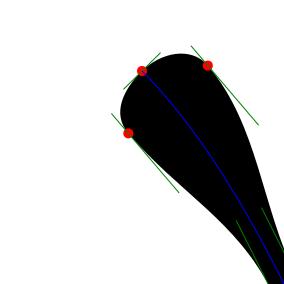

In [12]:
d = svgwrite.Drawing(size=(size, size), debug=True)

x = np.linspace(1.0, 0.5, 50)
y = x ** 2
bone = np.vstack([x,y]).T

tip = U.Tip(d, bone, 0.05)
tip.construct()
tip.draw()
tip.draw_keypoints()

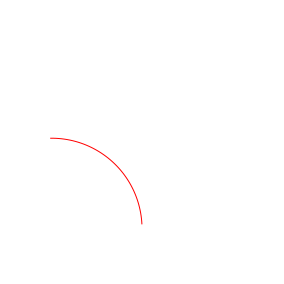

In [88]:
pos = np.array([0.5, 0.8])
steps = 50
v = np.array([0, -1]) * 0.01
vs = []
bone = []

for i in range(steps):
    v = U.rotate(v, 90 / steps)    
    pos += v
    bone.append(pos.copy())    
    vs.append(v)

bone = np.vstack(bone)

d = svgwrite.Drawing(size=(size, size), debug=True)
d.add(d.polyline(bone * size, stroke_width=1, stroke="red", fill="none"))
d

In [91]:
def draw(width=0.1, begin_anchor_rate=0.3, bulge_anchor_rate_backward=0.3, bulge_anchor_rate_forward=0.1, bulge_pos=0.75, bulge_size=0.2, end_anchor_rate_to_bulge=0.5):
    d = svgwrite.Drawing(size=(size, size), debug=True)
#     x = np.linspace(1.0, 0.5, 50)
#     y = x ** 2
#     bone = np.vstack([x,y]).T

    
    length = U.get_length(bone)
    width = length * width

    tip = U.Tip(d, bone, 0.05)
    tip.construct(width, begin_anchor_rate, bulge_anchor_rate_backward, bulge_anchor_rate_forward, bulge_pos, bulge_size, end_anchor_rate_to_bulge)
    tip.draw()
#     tip.draw_keypoints()    
    return tip.drawing

In [92]:
from ipywidgets import interact

r = (0, 1, 0.01)


interact(
    draw,
    width=r,
    begin_anchor_rate=r,
    bulge_anchor_rate_backward=r,
    bulge_anchor_rate_forward=r,
    bulge_pos=r,
    bulge_size=r,
    end_anchor_rate_to_bulge=r)


interactive(children=(FloatSlider(value=0.1, description='width', max=1.0, step=0.01), FloatSlider(value=0.3, …

<function __main__.draw(width=0.1, begin_anchor_rate=0.3, bulge_anchor_rate_backward=0.3, bulge_anchor_rate_forward=0.1, bulge_pos=0.75, bulge_size=0.2, end_anchor_rate_to_bulge=0.5)>

# 茎との接続

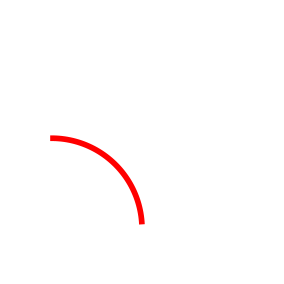

In [93]:
pos = np.array([0.5, 0.8])
steps = 50
v = np.array([0, -1]) * 0.01
vs = []
path = []

for i in range(steps):
    v = U.rotate(v, 90 / steps)    
    pos += v
    path.append(pos.copy())    
    vs.append(v)

path = np.vstack(path)

width = 0.02

d = svgwrite.Drawing(size=(size, size), debug=True)
d.add(d.polyline(path * size, stroke_width=width*size, stroke="red", fill="none", stroke_linecap='butt'))
d

In [112]:
d = svgwrite.Drawing(size=(size, size), debug=True)

bone = U.Tip.get_bone_from_path(path, width)
bone, stem = U.Tip.split_bone_from_path(path, width)

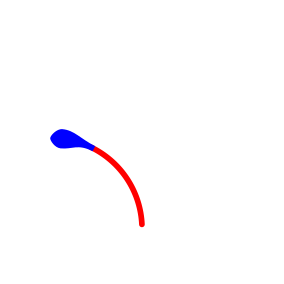

In [113]:
tip = U.Tip(d, bone, width)
d.add(d.polyline(stem * size, stroke_width=width*size, stroke="red", fill="none", stroke_linecap='round'))
d = tip.draw(d, fill='blue')
d

# これで、先端の描画と茎との統合が達成された。

続いて、茎の生成を行う。